In [1]:
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
from scipy.stats import mode
from hmmlearn import hmm

In [3]:
seqs = ['ATGCG','CGTGA','GCGTT','ATGCC','TTGCA']
labels = ['EEIII','EIIII','EEEII','EEIII','IIEEE']

In [4]:
obs_map = {'A':0,'T':1,'G':2,'C':3}
state_map = {"E":0,"I":1}

In [6]:
X = np.concatenate([[obs_map[c] for c in seq] for seq in seqs]).reshape(-1,1)
y = np.concatenate([[state_map[l] for l in lab] for lab in labels])

In [7]:
length = [len(seq) for seq in seqs]

In [9]:
model = hmm.MultinomialHMM(n_components=2,n_iter=100).fit(X,length)
_, hidden = model.decode(X)
mapped = {s: mode(y[hidden == s], keepdims=True).mode[0] for s in np.unique(hidden)}
pred = np.array([mapped[s] for s in hidden])


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [10]:
print("Accuracy : ",accuracy_score(y,pred))

Accuracy :  0.6


In [11]:
print("Classification report:\n")
print(classification_report(y,pred,target_names=['Exon','Intron']))

Classification report:

              precision    recall  f1-score   support

        Exon       1.00      0.09      0.17        11
      Intron       0.58      1.00      0.74        14

    accuracy                           0.60        25
   macro avg       0.79      0.55      0.45        25
weighted avg       0.77      0.60      0.49        25



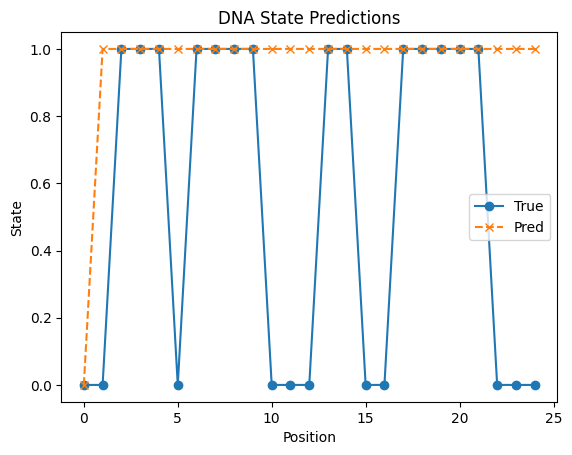

In [12]:
plt.plot(y,label = "True",marker='o')
plt.plot(pred,label='Pred',linestyle='--',marker='x')
plt.legend()
plt.title("DNA State Predictions")
plt.xlabel("Position")
plt.ylabel("State")
plt.show()